In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

url = "https://myanimelist.net/anime/genre/1/Action"

response = urllib.request.urlopen(url)
html = response.read()
mylist = []
df = pd.DataFrame()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    print(para.get_text())
    mylist.append(para.get_text())

for i in mylist:
    print(i)


Shingeki no Kyojin
Fullmetal Alchemist: Brotherhood
One Punch Man
Sword Art Online
Boku no Hero Academia
Kimetsu no Yaiba
Naruto
Tokyo Ghoul
Hunter x Hunter (2011)
Shingeki no Kyojin Season 2
Boku no Hero Academia 2nd Season
Naruto: Shippuuden
Jujutsu Kaisen
Shingeki no Kyojin Season 3
One Piece
Code Geass: Hangyaku no Lelouch
Shingeki no Kyojin Season 3 Part 2
Boku no Hero Academia 3rd Season
Noragami
Akame ga Kill!
Nanatsu no Taizai
Mob Psycho 100
Mirai Nikki (TV)
Ansatsu Kyoushitsu
Sword Art Online II
Bleach
Ao no Exorcist
Shingeki no Kyojin: The Final Season
Kiseijuu: Sei no Kakuritsu
Cowboy Bebop
Neon Genesis Evangelion
Tokyo Ghoul √A
Code Geass: Hangyaku no Lelouch R2
Fairy Tail
Kill la Kill
Boku no Hero Academia 4th Season
One Punch Man 2nd Season
JoJo no Kimyou na Bouken (TV)
Psycho-Pass
Darling in the FranXX
Soul Eater
Black Clover
Tengen Toppa Gurren Lagann
Overlord
Tate no Yuusha no Nariagari
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka
Elfen Lied
Highschool of t

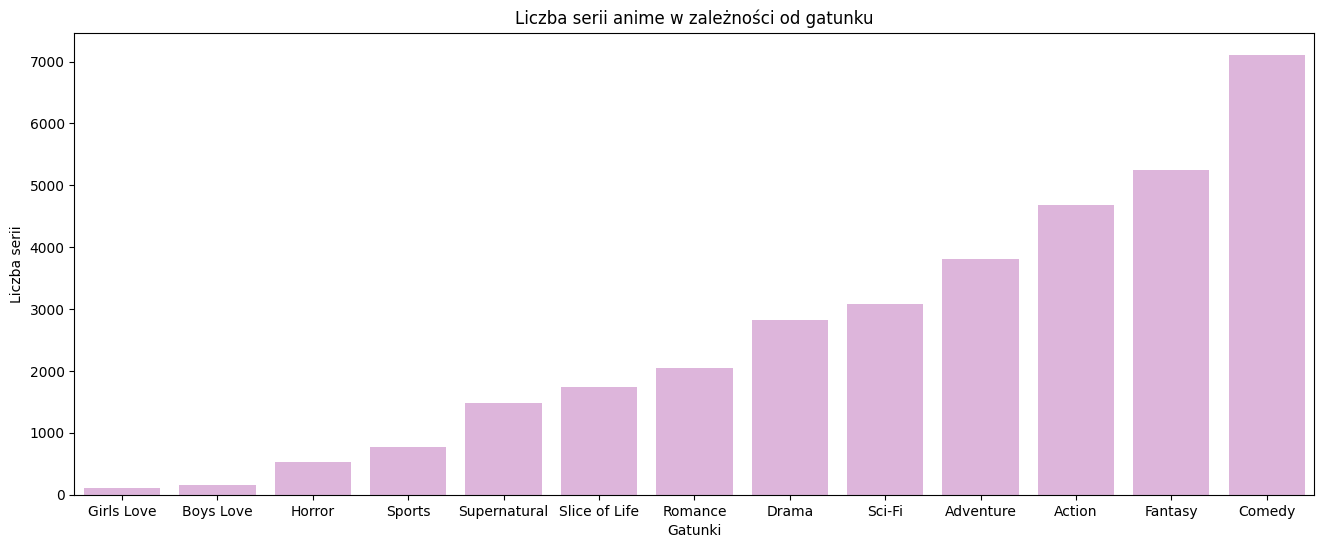

In [4]:
# Anime - ilość serii w zależności od gatunku

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# aggregate data
df = pd.DataFrame({'Gatunki': ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Slice of Life', 'Supernatural', 'Boys Love', 'Girls Love', 'Horror', 'Sports'], 'Liczba serii': [4674,3813,7110,2823,5245,2040,3074,1745,1484,164,111,529,766]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.title("Liczba serii anime w zależności od gatunku")
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, color='#e3afe1');

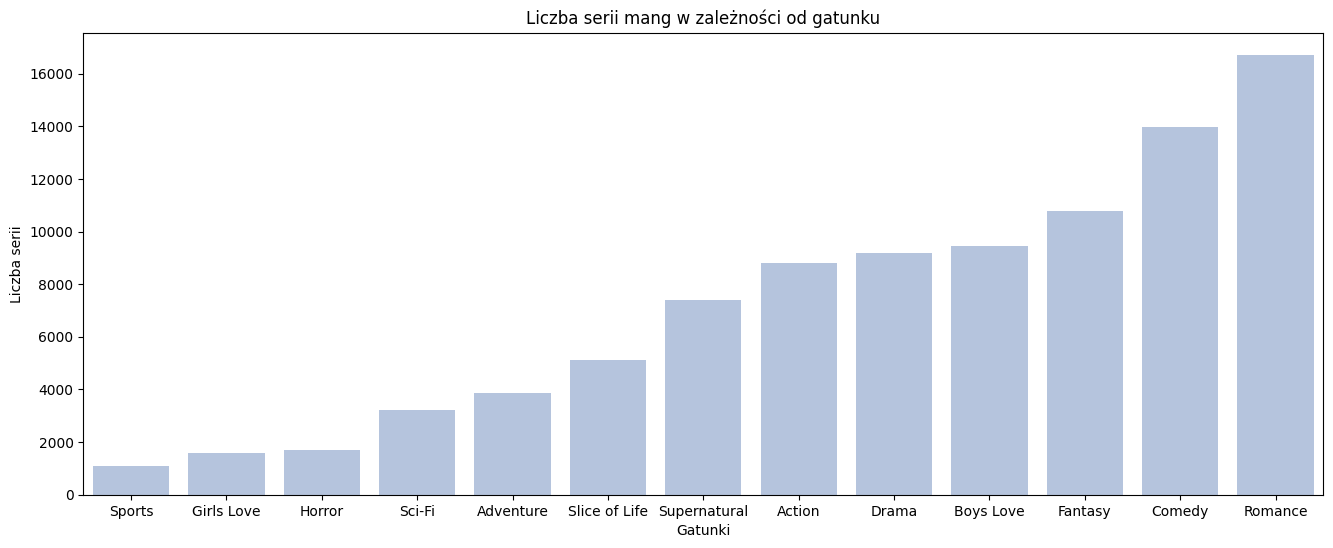

In [5]:
# Manga - ilość serii w zależności od gatunku

import seaborn as sns
import pandas as pd

# aggregate data
df = pd.DataFrame({'Gatunki': ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Slice of Life', 'Supernatural', 'Boys Love', 'Girls Love', 'Horror', 'Sports'], 'Liczba serii': [8806, 3874, 13993, 9170, 10769, 16722, 3204, 5137, 7398, 9460, 1598, 1686, 1099]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.title("Liczba serii mang w zależności od gatunku")
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, color="#afc3e3");

In [ ]:
# top 1000 serii

import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for i in range(0,20):
    if(i==0):
        url = "https://myanimelist.net/topanime.php?type=bypopularity"
    else:
        url = "https://myanimelist.net/topanime.php?type=bypopularity&limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
        else:
            print("No year found.")

result2 = count_years(years2)
print(result2)

new_dict = dict(sorted(result2.items()))
print(new_dict)

yr = list(new_dict.keys())
vl = list(new_dict.values())

{'2013': 60, '2006': 24, '2009': 27, '2015': 71, '2012': 58, '2016': 67, '2019': 62, '2002': 7, '2014': 71, '2011': 44, '2017': 65, '2007': 28, '2020': 58, '2018': 67, '1999': 5, '2008': 29, '2010': 42, '2004': 11, '1998': 8, '2001': 5, '1995': 4, '2003': 7, '2022': 48, '2021': 74, '1997': 5, '1989': 3, '1988': 4, '1986': 2, '2005': 12, '2000': 5, '1992': 3, '1996': 3, '2023': 19, '1984': 1, '1993': 1}
{'1984': 1, '1986': 2, '1988': 4, '1989': 3, '1992': 3, '1993': 1, '1995': 4, '1996': 3, '1997': 5, '1998': 8, '1999': 5, '2000': 5, '2001': 5, '2002': 7, '2003': 7, '2004': 11, '2005': 12, '2006': 24, '2007': 28, '2008': 29, '2009': 27, '2010': 42, '2011': 44, '2012': 58, '2013': 60, '2014': 71, '2015': 71, '2016': 67, '2017': 65, '2018': 67, '2019': 62, '2020': 58, '2021': 74, '2022': 48, '2023': 19}


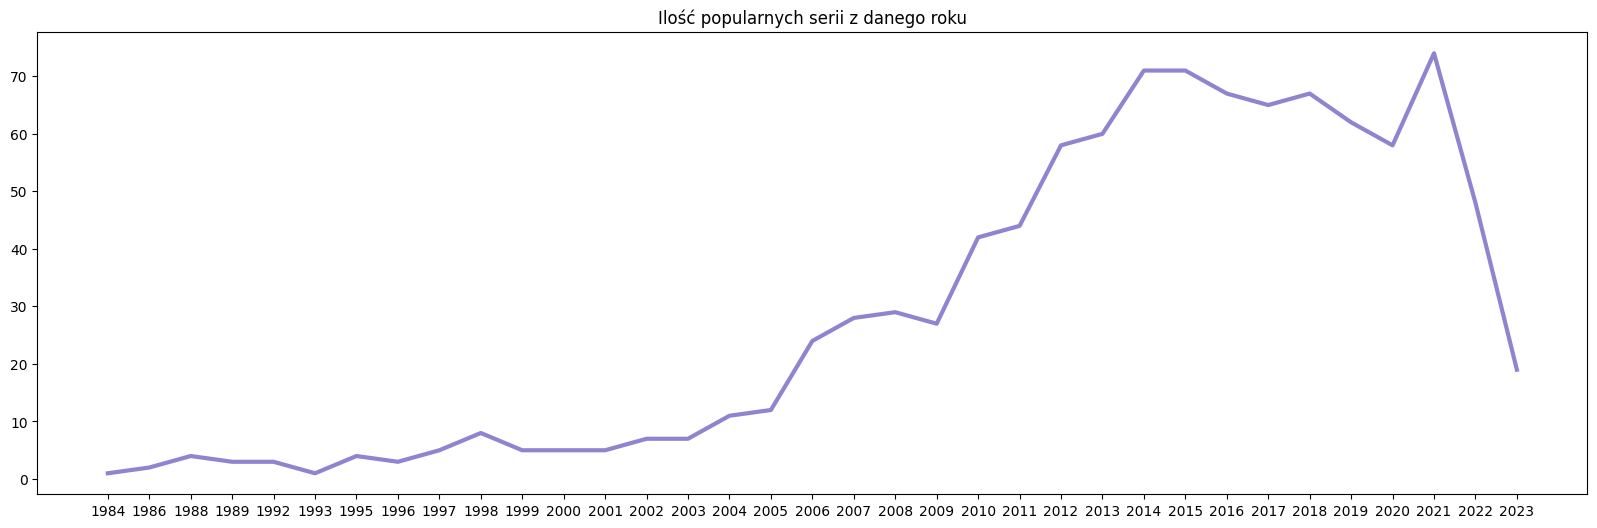

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.title("Ilość popularnych serii z danego roku")
plt.plot(yr,vl, color='#9084D1', linewidth = '3')

{'1989': 7, '2004': 10, '2001': 14, '1994': 6, '1997': 6, '2007': 16, '2014': 22, '1999': 10, '2006': 22, '1990': 8, '2012': 33, '2009': 12, '2011': 25, '1982': 3, '2003': 18, '1996': 10, '2010': 13, '2013': 23, '1968': 1, '2005': 12, '1970': 1, '2008': 13, '2016': 19, '2000': 8, '2002': 15, '1998': 8, '2015': 29, '1992': 4, '2017': 13, '1967': 1, '1985': 1, '1976': 2, '1973': 6, '1988': 1, '1984': 2, '1969': 2, '1980': 3, '1993': 1, '2019': 8, '2018': 14, '1972': 4, '1991': 4, '2020': 6, '2021': 7, '1981': 2, '1995': 5}
{'1967': 1, '1968': 1, '1969': 2, '1970': 1, '1972': 4, '1973': 6, '1976': 2, '1980': 3, '1981': 2, '1982': 3, '1984': 2, '1985': 1, '1988': 1, '1989': 7, '1990': 8, '1991': 4, '1992': 4, '1993': 1, '1994': 6, '1995': 5, '1996': 10, '1997': 6, '1998': 8, '1999': 10, '2000': 8, '2001': 14, '2002': 15, '2003': 18, '2004': 10, '2005': 12, '2006': 22, '2007': 16, '2008': 13, '2009': 12, '2010': 13, '2011': 25, '2012': 33, '2013': 23, '2014': 22, '2015': 29, '2016': 19, '20

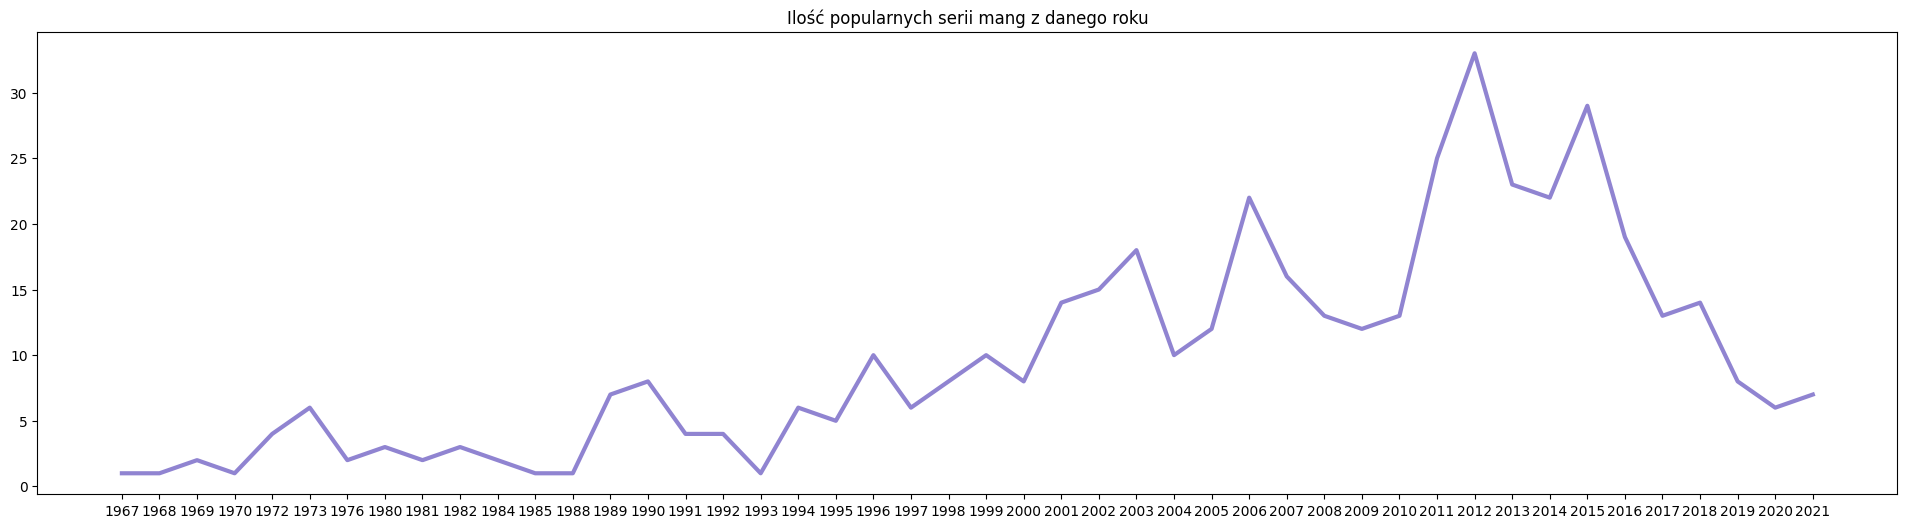

In [86]:
# 2019
# top 1000 serii mang

urltab = ["https://web.archive.org/web/20190128044238/https://myanimelist.net/topmanga.php?_location=mal_h_m",
          "https://web.archive.org/web/20190128051225/https://myanimelist.net/topmanga.php?limit=50",
          "https://web.archive.org/web/20190404165328/https://myanimelist.net/topmanga.php?limit=100",
          "https://web.archive.org/web/20210806020110/https://myanimelist.net/topmanga.php?limit=150",
          "https://web.archive.org/web/20221108043935/https://myanimelist.net/topmanga.php?limit=200",
          "https://web.archive.org/web/20221108043935/https://myanimelist.net/topmanga.php?limit=200",
          "https://web.archive.org/web/20221108043953/https://myanimelist.net/topmanga.php?limit=250",
          "https://web.archive.org/web/20221108044001/https://myanimelist.net/topmanga.php?limit=300",
          "https://web.archive.org/web/20221108044003/https://myanimelist.net/topmanga.php?limit=350",
          "https://web.archive.org/web/20151231113703/http://myanimelist.net/topmanga.php?limit=400",
          "https://web.archive.org/web/20151231110435/http://myanimelist.net/topmanga.php?limit=450",
          ]
import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for url in urltab:

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
        else:
            print("No year found.")

result2 = count_years(years2)
print(result2)

new_dict = dict(sorted(result2.items()))
print(new_dict)

yr = list(new_dict.keys())
vl = list(new_dict.values())

import matplotlib.pyplot as plt
import numpy as np

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(6)
plt.title("Ilość popularnych serii mang z danego roku")
plt.plot(yr,vl, color='#9084D1', linewidth = '3')

{'2009': 43, '2016': 58, '2011': 48, '2015': 79, '1988': 7, '2012': 52, '2017': 57, '2013': 58, '2008': 47, '2006': 36, '2001': 14, '2014': 67, '2018': 58, '1998': 11, '2000': 11, '1997': 10, '1999': 9, '2019': 29, '2005': 24, '2004': 17, '2007': 40, '2010': 45, '1980': 1, '1993': 6, '1992': 5, '2002': 16, '1984': 4, '2003': 20, '1996': 11, '1986': 5, '1979': 4, '1995': 7, '1970': 1, '1989': 4, '2020': 20, '1978': 3, '1990': 1, '1985': 3, '1994': 3, '1987': 1, '1982': 3, '1983': 3, '2021': 4, '1981': 1, '1977': 2, '1991': 2}
{'1970': 1, '1977': 2, '1978': 3, '1979': 4, '1980': 1, '1981': 1, '1982': 3, '1983': 3, '1984': 4, '1985': 3, '1986': 5, '1987': 1, '1988': 7, '1989': 4, '1990': 1, '1991': 2, '1992': 5, '1993': 6, '1994': 3, '1995': 7, '1996': 11, '1997': 10, '1998': 11, '1999': 9, '2000': 11, '2001': 14, '2002': 16, '2003': 20, '2004': 17, '2005': 24, '2006': 36, '2007': 40, '2008': 47, '2009': 43, '2010': 45, '2011': 48, '2012': 52, '2013': 58, '2014': 67, '2015': 79, '2016': 5

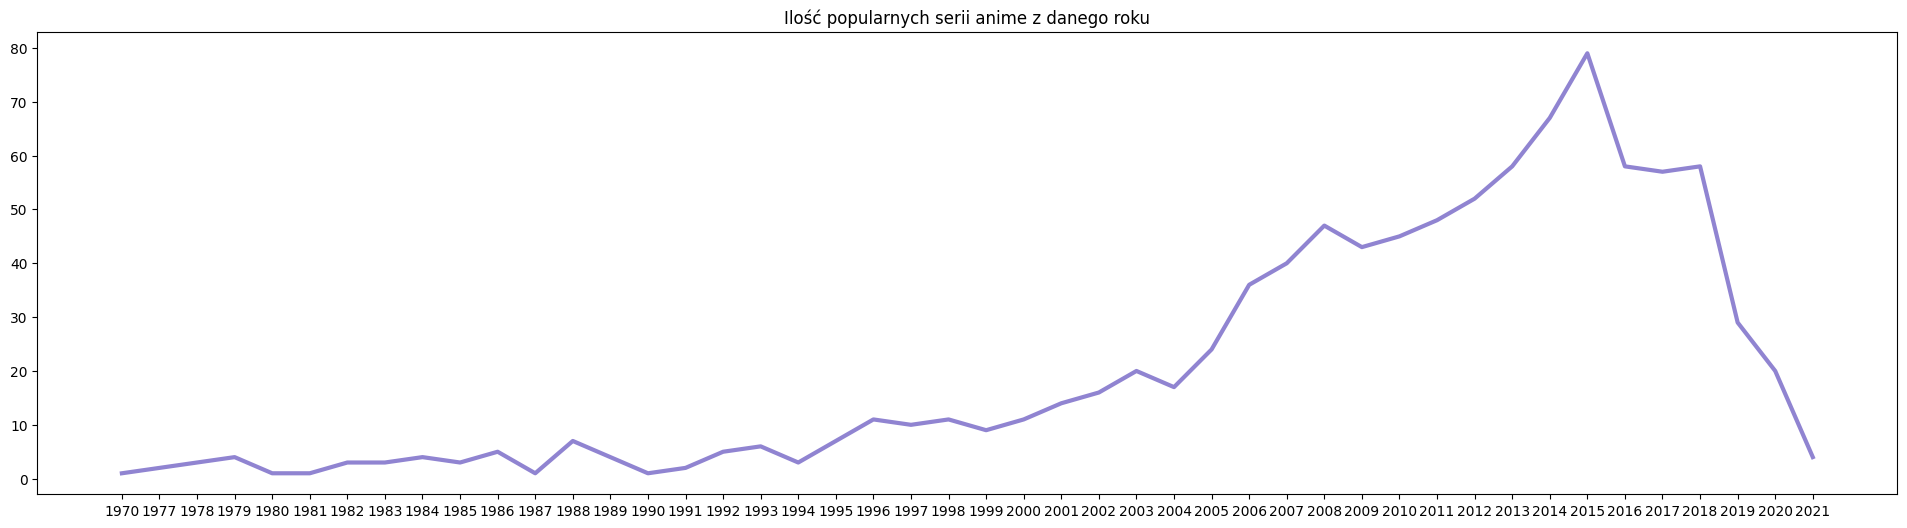

In [73]:
# 2019
# top 1000 serii anime

import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for i in range(0,20):
    if(i==0):
        url = "https://web.archive.org/web/20190123231339/https://myanimelist.net/topanime.php"
    else:
        url = "https://web.archive.org/web/20190128051031/https://myanimelist.net/topanime.php?limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
        else:
            print("No year found.")

result2 = count_years(years2)
print(result2)

new_dict = dict(sorted(result2.items()))
print(new_dict)

yr = list(new_dict.keys())
vl = list(new_dict.values())

import matplotlib.pyplot as plt
import numpy as np

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(6)
plt.title("Ilość popularnych serii anime z danego roku")
plt.plot(yr,vl, color='#9084D1', linewidth = '3')

In [ ]:
# 2023
# decades 5 000 anime
import urllib.request
from bs4 import BeautifulSoup
import re
years = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for i in range(0,100):
    if(i==0):
        url = "https://myanimelist.net/topanime.php?type=bypopularity"
    else:
        url = "https://myanimelist.net/topanime.php?type=bypopularity&limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years.append(year)
        # else:
        #     print("No year found.")

result2 = count_years(years)
# print(result2)

new_dict = dict(sorted(result2.items()))
# print(new_dict)

def group_by_decades(year_dict):
    decade_dict = {}
    for year, count in year_dict.items():
        decade = str(year)[:3] + "0s"
        if decade in decade_dict:
            decade_dict[decade] += count
        else:
            decade_dict[decade] = count
    return decade_dict

print(group_by_decades(new_dict))

{'1780s': 1, '1960s': 1, '1970s': 19, '1980s': 77, '1990s': 252, '2000s': 1161, '2010s': 2607, '2020s': 836}


{'1960s': 1, '1970s': 19, '1980s': 77, '1990s': 252, '2000s': 1161, '2010s': 2607, '2020s': 836}


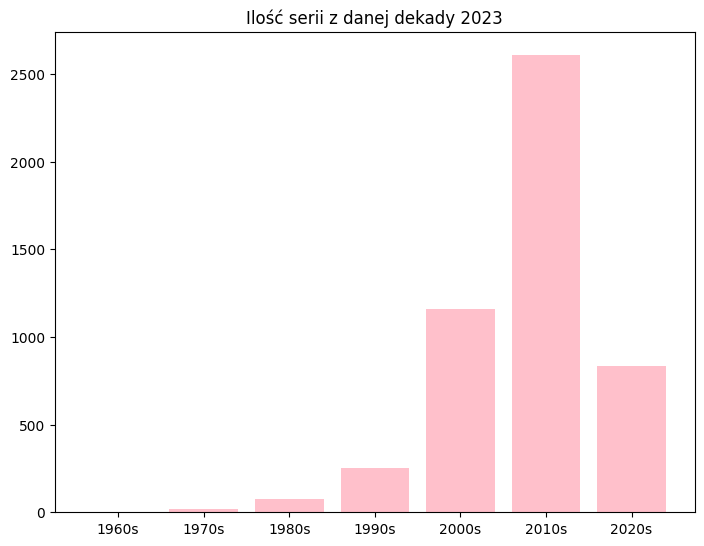

In [ ]:
new = group_by_decades(new_dict)
new.pop('1780s')
print(new)

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

yr2 = list(new.keys())
vl2 = list(new.values())

ax.bar(yr2,vl2, color='pink')
plt.title("Ilość serii z danej dekady 2023")
plt.show()

{'1970s': 10, '1980s': 32, '1990s': 65, '2000s': 268, '2010s': 551, '2020s': 24}
{'1970s': 10, '1980s': 32, '1990s': 65, '2000s': 268, '2010s': 551, '2020s': 24}


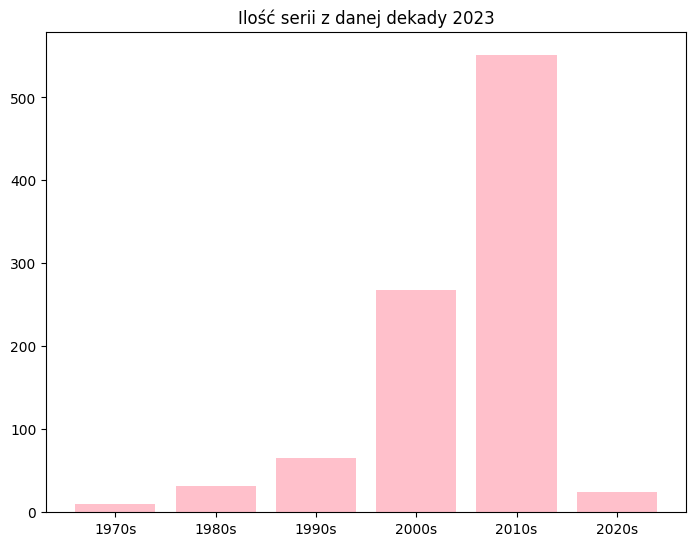

In [82]:
# 2019
# decades 1000 anime
import urllib.request
from bs4 import BeautifulSoup
import re
years = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for i in range(0,20):
    if(i==0):
        url = "https://web.archive.org/web/20190123231339/https://myanimelist.net/topanime.php"
    else:
        url = "https://web.archive.org/web/20190128051031/https://myanimelist.net/topanime.php?limit="+str(i*50)
    # print(url)
    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years.append(year)
        # else:
        #     print("No year found.")

result2 = count_years(years)
# print(result2)

new_dict = dict(sorted(result2.items()))
# print(new_dict)

def group_by_decades(year_dict):
    decade_dict = {}
    for year, count in year_dict.items():
        decade = str(year)[:3] + "0s"
        if decade in decade_dict:
            decade_dict[decade] += count
        else:
            decade_dict[decade] = count
    return decade_dict

print(group_by_decades(new_dict))

new = group_by_decades(new_dict)
# new.pop('1780s')
print(new)

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

yr2 = list(new.keys())
vl2 = list(new.values())

ax.bar(yr2,vl2, color='pink')
plt.title("Ilość serii z danej dekady 2023")
plt.show()

{'1960s': 4, '1970s': 13, '1980s': 19, '1990s': 62, '2000s': 140, '2010s': 199, '2020s': 13}
{'1960s': 4, '1970s': 13, '1980s': 19, '1990s': 62, '2000s': 140, '2010s': 199, '2020s': 13}


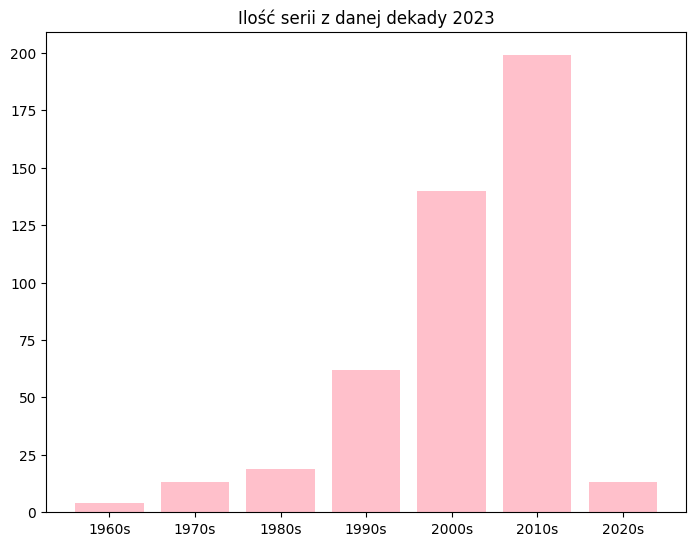

In [87]:
# 2019
# decades 500 manga
import urllib.request
from bs4 import BeautifulSoup
import re
years = []

def count_years(year_list):
    year_count = {}
    for year in year_list:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
    return year_count

for url in urltab:

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years.append(year)
        # else:
        #     print("No year found.")

result2 = count_years(years)
# print(result2)

new_dict = dict(sorted(result2.items()))
# print(new_dict)

def group_by_decades(year_dict):
    decade_dict = {}
    for year, count in year_dict.items():
        decade = str(year)[:3] + "0s"
        if decade in decade_dict:
            decade_dict[decade] += count
        else:
            decade_dict[decade] = count
    return decade_dict

print(group_by_decades(new_dict))

new = group_by_decades(new_dict)
# new.pop('1780s')
print(new)

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

yr2 = list(new.keys())
vl2 = list(new.values())

ax.bar(yr2,vl2, color='pink')
plt.title("Ilość serii z danej dekady 2023")
plt.show()

In [63]:
# top 100 serii

import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []
rank = []
count = 1;
for i in range(0,2):
    if(i==0):
        url = "https://myanimelist.net/topanime.php?type=bypopularity"
    else:
        url = "https://myanimelist.net/topanime.php?type=bypopularity&limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
            rank.append(count)
            # print(count)
            count=count+1
        else:
            print("No year found.")



['1995', '1998', '1999', '2001', '2002', '2003', '2004', '2004', '2004', '2006', '2006', '2007', '2007', '2007', '2008', '2008', '2008', '2009', '2009', '2009', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2021', '2021', '2022']
[45, 43, 20, 44, 8, 76, 97, 71, 39, 2, 21, 65, 15, 82, 47, 62, 22, 87, 3, 49, 28, 85, 72, 10, 73, 63, 13, 33, 40, 90, 56, 91, 5, 59, 60, 81, 80, 68, 51, 1, 29, 23, 9, 27, 31, 16, 35, 36, 42, 4, 48, 34, 95, 8

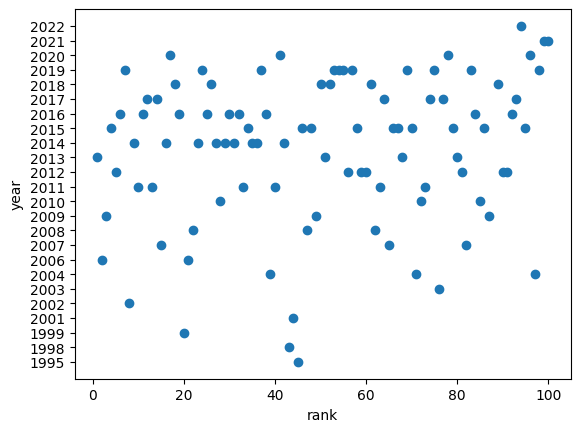

In [62]:
import numpy as np

rok = []
ranga = []

for i in range(0,99):
  # print(years2[np.argsort(years2)[i]])
  rok.append(years2[np.argsort(years2)[i]])
  # print(rank[np.argsort(years2)[i]])
  ranga.append(rank[np.argsort(years2)[i]])

print(rok)
print(ranga)

from sklearn.linear_model import LinearRegression
npX = np.array(ranga)
npY = np.array(rok)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(ranga, rok)

plt.xlabel("rank");
plt.ylabel("year");

['1980', '1988', '1988', '1993', '1997', '1998', '1999', '1999', '1999', '2000', '2001', '2004', '2004', '2004', '2005', '2006', '2006', '2006', '2006', '2007', '2008', '2008', '2008', '2008', '2009', '2009', '2009', '2009', '2009', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2019']
[65, 87, 6, 92, 30, 26, 94, 31, 36, 29, 18, 90, 49, 41, 38, 55, 13, 99, 32, 43, 79, 17, 73, 12, 75, 72, 40, 1, 97, 78, 48, 60, 86, 5, 64, 95, 7, 3, 93, 8, 35, 62, 56, 88, 46, 58, 11, 33, 84, 68, 27, 20, 34, 

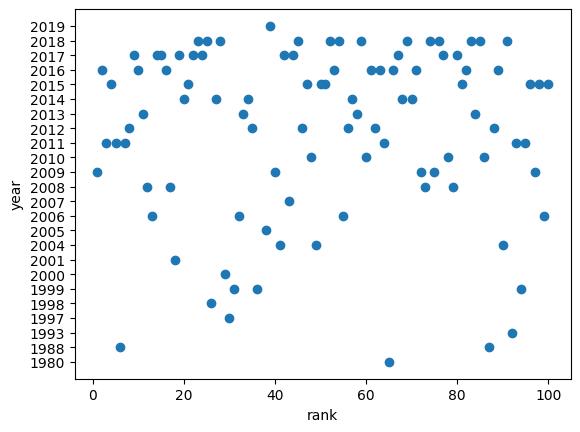

In [83]:
# 2019
# top 100 serii

import urllib.request
from bs4 import BeautifulSoup
import re
years2 = []
rank = []
count = 1;
for i in range(0,2):
    if(i==0):
        url = "https://web.archive.org/web/20190123231339/https://myanimelist.net/topanime.php"
    else:
        url = "https://web.archive.org/web/20190128051031/https://myanimelist.net/topanime.php?limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')

    for div in div_elements:
        # print(div.get_text())
        text = div.get_text()
        year_match = re.search(r"\b\d{4}\b", text)

        if year_match:
            year = year_match.group()
            # print("Year:", year)
            years2.append(year)
            rank.append(count)
            # print(count)
            count=count+1
        else:
            print("No year found.")

import numpy as np

rok = []
ranga = []

for i in range(0,99):
  # print(years2[np.argsort(years2)[i]])
  rok.append(years2[np.argsort(years2)[i]])
  # print(rank[np.argsort(years2)[i]])
  ranga.append(rank[np.argsort(years2)[i]])

print(rok)
print(ranga)

from sklearn.linear_model import LinearRegression
npX = np.array(ranga)
npY = np.array(rok)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(ranga, rok)

plt.xlabel("rank");
plt.ylabel("year");


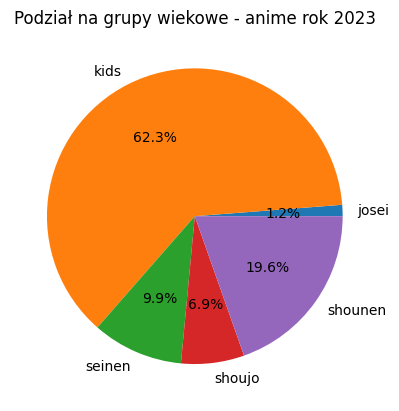

In [ ]:
# Podział na grupy wiekowe - anime
import matplotlib.pyplot as plt
import numpy as np

genres = ["josei", "kids", "seinen", "shoujo", "shounen" ]
number = [117, 5928, 946, 656, 1864]
plt.title("Podział na grupy wiekowe - anime rok 2023")
plt.pie(number, labels=genres, autopct='%1.1f%%')
plt.show()

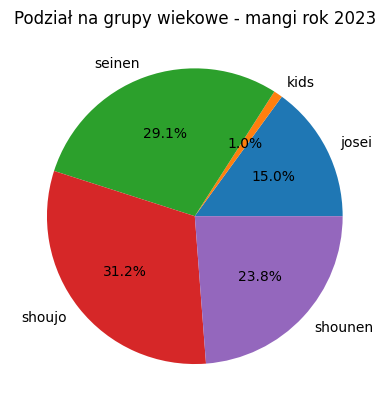

In [ ]:
# Podział na grupy wiekowe - manga
import matplotlib.pyplot as plt
import numpy as np

genres = ["josei", "kids", "seinen", "shoujo", "shounen" ]
number = [3918, 256, 7605, 8148, 6221]
plt.title("Podział na grupy wiekowe - mangi rok 2023")
plt.pie(number, labels=genres, autopct='%1.1f%%')
plt.show()

['Shingeki no Kyojin', 'Death Note', 'Fullmetal Alchemist: Brotherhood', 'One Punch Man', 'Sword Art Online', 'Boku no Hero Academia', 'Kimetsu no Yaiba', 'Naruto', 'Tokyo Ghoul', 'Hunter x Hunter (2011)', 'Kimi no Na wa.', 'Shingeki no Kyojin Season 2', 'Steins;Gate', 'Boku no Hero Academia 2nd Season', 'Naruto: Shippuuden', 'No Game No Life', 'Jujutsu Kaisen', 'Shingeki no Kyojin Season 3', 'Koe no Katachi', 'One Piece', 'Code Geass: Hangyaku no Lelouch', 'Toradora!', 'Shigatsu wa Kimi no Uso', 'Shingeki no Kyojin Season 3 Part 2', 'Re:Zero kara Hajimeru Isekai Seikatsu', 'Boku no Hero Academia 3rd Season', 'Noragami', 'Angel Beats!', 'Akame ga Kill!', 'Boku dake ga Inai Machi', 'Nanatsu no Taizai', 'Mob Psycho 100', 'Mirai Nikki (TV)', 'Ansatsu Kyoushitsu', 'Sword Art Online II', 'Haikyuu!!', 'Yakusoku no Neverland', 'Kono Subarashii Sekai ni Shukufuku wo!', 'Bleach', 'Ao no Exorcist', 'Shingeki no Kyojin: The Final Season', 'Kiseijuu: Sei no Kakuritsu', 'Cowboy Bebop', 'Sen to Chih

Text(0.5, 1.0, 'Zależność między popularnością a oceną')

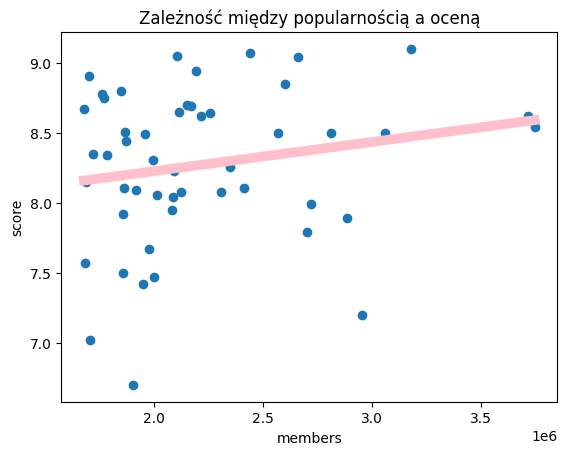

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

# wyciągamy ilość osób które oceniły daną serię
div_elements = htmlParse.find_all('div', class_='information di-ib mt4')
for div in div_elements:
    text = div.get_text()
    match = re.findall(r"\b\d{1,3}(?:,\d{3})*\b", text)
    if(len(match)==2):
        number = int(match[1].replace(",", ""))
        mylist.append(number)
    else:
        number = int(match[0].replace(",", ""))
        mylist.append(number)


anime = []

# wyciągamy tytuły serii
for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if(text == 'MoreTop Anime\n        '):
        break  # Stop extracting text if 'Top Anime' is encountered
    anime.append(text)

print(anime)
print(mylist)

score = []

div_elements = htmlParse.find_all('div', class_='js-top-ranking-score-col di-ib al')
for div in div_elements:
    text = float(div.get_text())
    score.append(text)

print(score)

from sklearn.linear_model import LinearRegression
npX = np.array(mylist)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(mylist, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")

# for i, txt in enumerate(anime):
#     ax.annotate(txt, (mylist[i], score[i]))

[8.54, 8.62, 9.1, 8.5, 7.2, 7.89, 8.5, 7.99, 7.79, 9.04, 8.85, 8.51, 9.07, 8.11, 8.26, 8.08, 8.64, 8.62, 8.94, 8.69, 8.7, 8.08, 8.65, 9.05, 8.23, 8.04, 7.95, 8.06, 7.47, 8.31, 7.67, 8.49, 7.42, 8.09, 6.7, 8.44, 8.51, 8.11, 7.92, 7.5, 8.8, 8.34, 8.75, 8.78, 8.35, 7.02, 8.91, 8.15, 7.57, 8.67, 8.04, 8.24, 8.41, 7.9, 8.29, 7.48, 7.5, 8.16, 7.89, 8.34, 7.21, 7.84, 8.31, 8.14, 8.63, 7.75, 7.91, 7.75, 7.98, 7.55, 7.48, 7.07, 8.28, 8.27, 8.8, 8.11, 7.24, 8.62, 8.16, 8.01, 7.34, 8.0, 8.74, 8.11, 8.49, 8.63, 8.33, 8.61, 8.14, 8.08, 7.71, 7.82, 8.66, 8.58, 7.49, 8.64, 8.66, 7.71, 8.8, 8.2, 8.36, 8.08, 8.01, 7.15, 8.67, 8.51, 7.96, 7.42, 8.16, 8.37, 7.99, 8.06, 7.86, 8.93, 8.1, 8.24, 8.78, 7.66, 8.77, 7.57, 7.73, 6.37, 8.1, 7.39, 8.09, 7.76, 7.92, 8.16, 7.59, 8.55, 8.5, 8.44, 7.42, 8.34, 7.48, 8.42, 8.19, 8.94, 7.41, 8.21, 8.87, 7.85, 8.25, 8.02, 7.56, 7.16, 7.74, 7.97, 7.96, 7.61, 7.76, 8.17, 8.03, 8.58, 7.65, 8.24, 8.01, 8.29, 7.94, 7.06, 8.06, 7.28, 7.58, 7.44, 7.21, 7.91, 8.56, 7.83, 7.09, 8.

Text(0.5, 1.0, 'Zależność między popularnością a oceną')

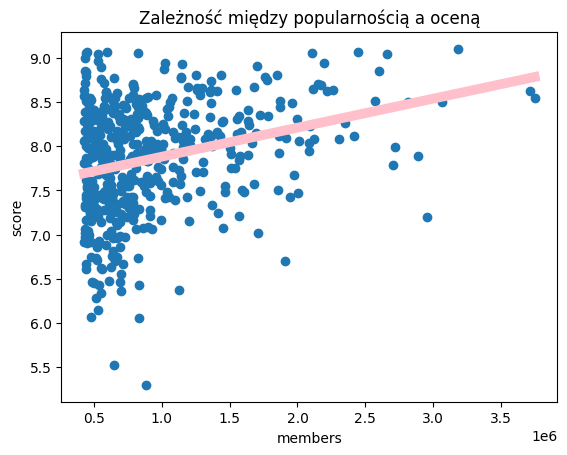

In [18]:
# dla 1000 danych scatter plot
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

anime = []
score = []
mylist = list()

for i in range(0,10):
    if(i==0):
        url = "https://myanimelist.net/topanime.php?type=bypopularity"
    else:
        url = "https://myanimelist.net/topanime.php?type=bypopularity&limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()



    htmlParse = BeautifulSoup(html, 'html.parser')

    # wyciągamy ilość osób które oceniły daną serię
    div_elements = htmlParse.find_all('div', class_='information di-ib mt4')
    for div in div_elements:
        text = div.get_text()
        match = re.findall(r"\b\d{1,3}(?:,\d{3})*\b", text)
        if(len(match)==2):
            number = int(match[1].replace(",", ""))
            mylist.append(number)
        else:
            number = int(match[0].replace(",", ""))
            mylist.append(number)


    div_elements = htmlParse.find_all('div', class_='js-top-ranking-score-col di-ib al')
    for div in div_elements:
      if(div.get_text!='N/A'):
        # print(div.get_text())
        text = float(div.get_text())
        score.append(text)

print(score)

from sklearn.linear_model import LinearRegression
npX = np.array(mylist)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(mylist, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Shingeki no Kyojin
Fullmetal Alchemist: Brotherhood
One Punch Man
Sword Art Online
Boku no Hero Academia
Kimetsu no Yaiba
Naruto
Tokyo Ghoul
Hunter x Hunter (2011)
Shingeki no Kyojin Season 2
Boku no Hero Academia 2nd Season
Naruto: Shippuuden
Jujutsu Kaisen
Shingeki no Kyojin Season 3
One Piece
Code Geass: Hangyaku no Lelouch
Shingeki no Kyojin Season 3 Part 2
Boku no Hero Academia 3rd Season
Noragami
Akame ga Kill!
Nanatsu no Taizai
Mob Psycho 100
Mirai Nikki (TV)
Ansatsu Kyoushitsu
Sword Art Online II
Bleach
Ao no Exorcist
Shingeki no Kyojin: The Final Season
Kiseijuu: Sei no Kakuritsu
Cowboy Bebop
Neon Genesis Evangelion
Tokyo Ghoul √A
Code Geass: Hangyaku no Lelouch R2
Fairy Tail
34


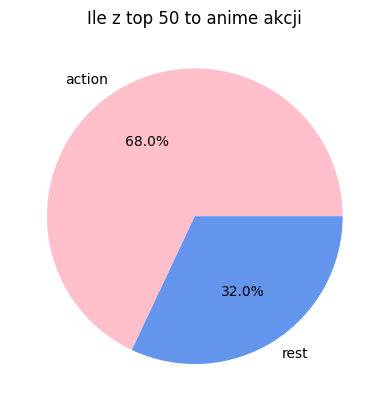

In [ ]:
# Anime akcji - top 50 ile pokrywa się z toplistą wszystkich anime

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if text == 'MoreTop Anime\n        ':
        break  # Stop extracting text if 'Top Anime' is encountered
    anime2.append(text)


url = "https://myanimelist.net/anime/genre/1/Action"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    text = para.get_text()
    anime3.append(text)

counter2 = 0
rest = 0

for element in anime3:
    if element in anime2:
        print(element)
        counter2 += 1

print(counter2)
rest = 50 - counter2

import matplotlib.pyplot as plt
import numpy as np

genres = ["action", "rest"]
number = [counter2, rest]
plt.title("Ile z top 50 to anime akcji")
plt.pie(number, labels=genres, autopct='%1.1f%%', colors=['pink', 'cornflowerblue'])
plt.show()


One Punch Man
No Game No Life
Mob Psycho 100
Ansatsu Kyoushitsu
Kono Subarashii Sekai ni Shukufuku wo!
5


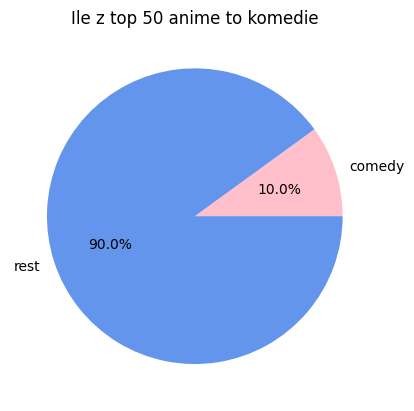

In [ ]:
# Anime komedie - top 50 ile pokrywa się z toplistą wszystkich anime

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if text == 'MoreTop Anime\n        ':
        break  # Stop extracting text if 'Top Anime' is encountered
    anime2.append(text)


url = "https://myanimelist.net/anime/genre/4/Comedy"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    text = para.get_text()
    anime3.append(text)

counter2 = 0
rest = 0

for element in anime3:
    if element in anime2:
        print(element)
        counter2 += 1

print(counter2)
rest = 50 - counter2

import matplotlib.pyplot as plt
import numpy as np

genres = ["comedy", "rest"]
number = [counter2, rest]
plt.title("Ile z top 50 anime to komedie")
plt.pie(number, labels=genres, autopct='%1.1f%%',colors=['pink', 'cornflowerblue'])
plt.show()


Fullmetal Alchemist: Brotherhood
Sword Art Online
Kimetsu no Yaiba
Naruto
Tokyo Ghoul
Hunter x Hunter (2011)
Naruto: Shippuuden
No Game No Life
Jujutsu Kaisen
One Piece
Re:Zero kara Hajimeru Isekai Seikatsu
Noragami
Akame ga Kill!
Nanatsu no Taizai
Sword Art Online II
Yakusoku no Neverland
Kono Subarashii Sekai ni Shukufuku wo!
Bleach
Ao no Exorcist
Tokyo Ghoul √A
Fairy Tail
Violet Evergarden
22


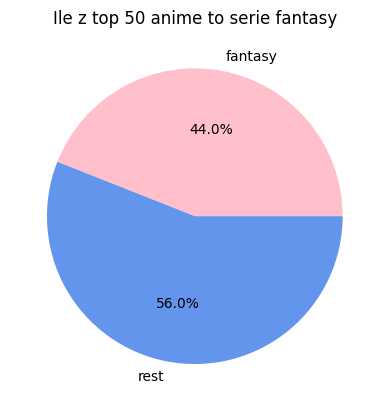

In [ ]:
# Anime fantasy - top 50 ile pokrywa się z toplistą wszystkich anime

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if text == 'MoreTop Anime\n        ':
        break  # Stop extracting text if 'Top Anime' is encountered
    anime2.append(text)


url = "https://myanimelist.net/anime/genre/10/Fantasy"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    text = para.get_text()
    anime3.append(text)

counter2 = 0
rest = 0

for element in anime3:
    if element in anime2:
        print(element)
        counter2 += 1

print(counter2)
rest = 50 - counter2

import matplotlib.pyplot as plt
import numpy as np

genres = ["fantasy", "rest"]
number = [counter2, rest]
plt.title("Ile z top 50 anime to serie fantasy")
plt.pie(number, labels=genres, autopct='%1.1f%%', colors=['pink', 'cornflowerblue'])
plt.show()

Fullmetal Alchemist: Brotherhood
Sword Art Online
Naruto
Hunter x Hunter (2011)
Naruto: Shippuuden
One Piece
Nanatsu no Taizai
Sword Art Online II
Kono Subarashii Sekai ni Shukufuku wo!
Bleach
Sen to Chihiro no Kamikakushi
Fairy Tail
12


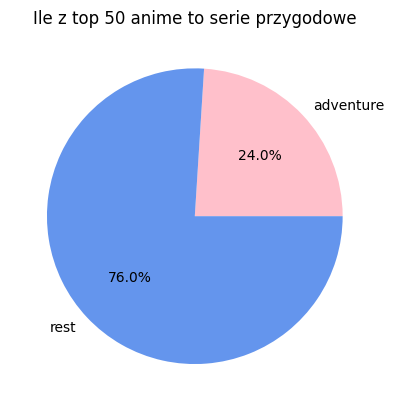

In [ ]:
# Anime przygodowe - top 50 ile pokrywa się z toplistą wszystkich anime

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if text == 'MoreTop Anime\n        ':
        break  # Stop extracting text if 'Top Anime' is encountered
    anime2.append(text)


url = "https://myanimelist.net/anime/genre/2/Adventure"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    text = para.get_text()
    anime3.append(text)

counter2 = 0
rest = 0

for element in anime3:
    if element in anime2:
        print(element)
        counter2 += 1

print(counter2)
rest = 50 - counter2

import matplotlib.pyplot as plt
import numpy as np

genres = ["adventure", "rest"]
number = [counter2, rest]
plt.title("Ile z top 50 anime to serie przygodowe")
plt.pie(number, labels=genres, autopct='%1.1f%%', colors=['pink', 'cornflowerblue'])
plt.show()

Steins;Gate
Code Geass: Hangyaku no Lelouch
Yakusoku no Neverland
Kiseijuu: Sei no Kakuritsu
Cowboy Bebop
Neon Genesis Evangelion
Code Geass: Hangyaku no Lelouch R2
7


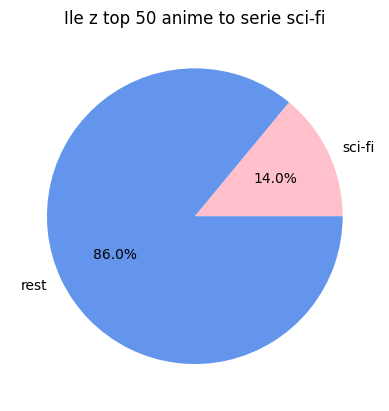

In [ ]:
# Anime sci-fi - top 50 ile pokrywa się z toplistą wszystkich anime

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

url = "https://myanimelist.net/topanime.php?type=bypopularity"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h3'):
    text = para.get_text()
    if text == 'MoreTop Anime\n        ':
        break  # Stop extracting text if 'Top Anime' is encountered
    anime2.append(text)


url = "https://myanimelist.net/anime/genre/24/Sci-Fi"

response = urllib.request.urlopen(url)
html = response.read()

htmlParse = BeautifulSoup(html, 'html.parser')

for para in htmlParse.find_all('h2'):
    text = para.get_text()
    anime3.append(text)

counter2 = 0
rest = 0

for element in anime3:
    if element in anime2:
        print(element)
        counter2 += 1

print(counter2)
rest = 50 - counter2

import matplotlib.pyplot as plt
import numpy as np

genres = ["sci-fi", "rest"]
number = [counter2, rest]
plt.title("Ile z top 50 anime to serie sci-fi")
plt.pie(number, labels=genres, autopct='%1.1f%%', colors=['pink', 'cornflowerblue'])
plt.show()

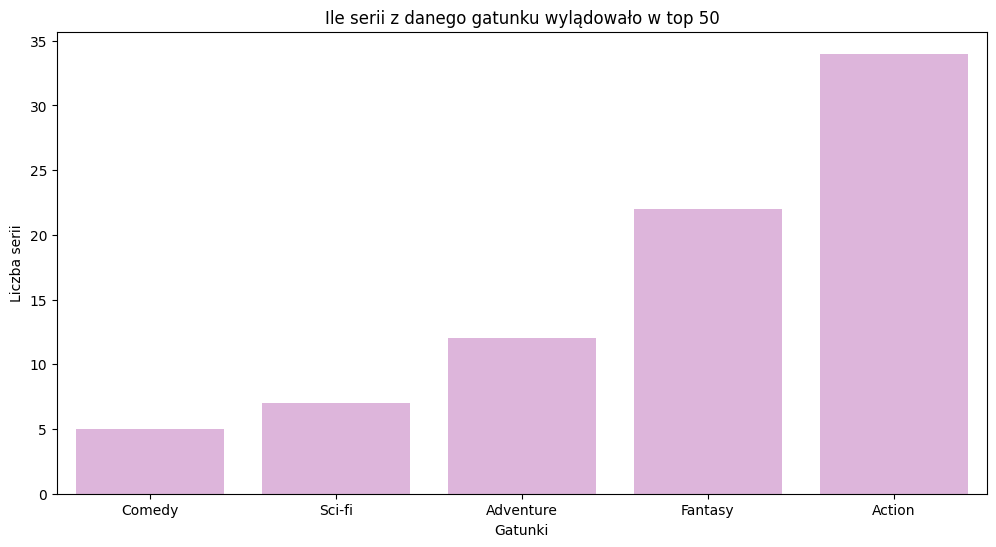

In [27]:
# Przegląd gatunków w top 50
import seaborn as sns
import pandas as pd

# aggregate data
df = pd.DataFrame({'Gatunki': ['Action', 'Comedy','Fantasy', 'Adventure', 'Sci-fi'], 'Liczba serii': [34, 5, 22, 12, 7]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.title("Ile serii z danego gatunku wylądowało w top 50")
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, color='#e3afe1');

In [24]:
# Action

import urllib.request
from bs4 import BeautifulSoup
import json

anime2 = []
anime3 = []

for i in range(0,20):
    if(i==0):
        url = "https://myanimelist.net/topanime.php?type=bypopularity"
    else:
        url = "https://myanimelist.net/topanime.php?type=bypopularity&limit="+str(i*50)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    for para in htmlParse.find_all('h3'):
        text = para.get_text()
        if text == 'MoreTop Anime\n        ':
            break  # Stop extracting text if 'Top Anime' is encountered
        anime2.append(text)


for i in range(0,10):
    if(i==0):
        url = "https://myanimelist.net/anime/genre/24/Sci-Fi"
    else:
        url = "https://myanimelist.net/anime/genre/24/Sci-Fi?page="+str(i)

    response = urllib.request.urlopen(url)
    html = response.read()

    htmlParse = BeautifulSoup(html, 'html.parser')

    for para in htmlParse.find_all('h2'):
        text = para.get_text()
        anime3.append(text)

    counter2 = 0
    rest = 0

for element in anime3:
    if element in anime2:
        # print(element)
        counter2 += 1

print(counter2)

246


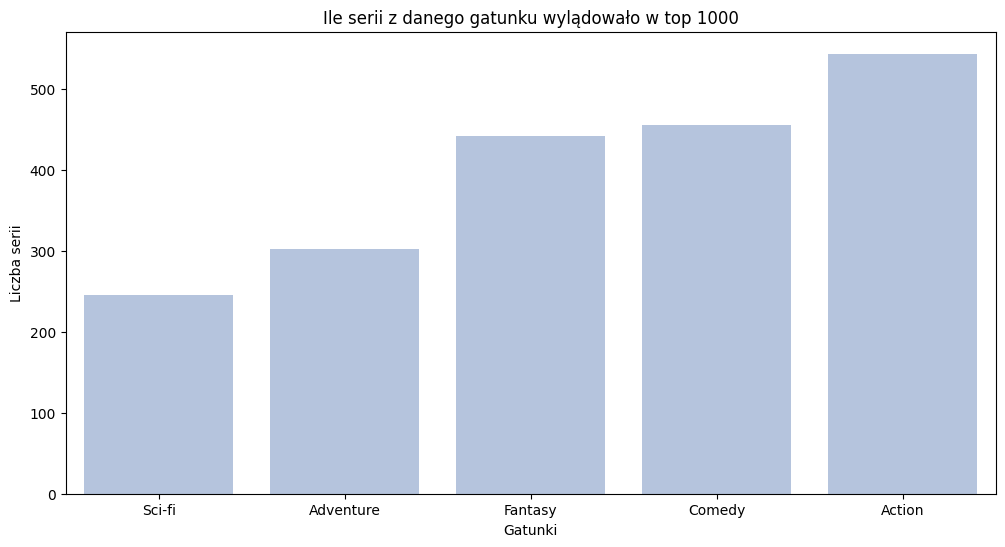

In [28]:
# Przegląd gatunków w top 1000
import seaborn as sns
import pandas as pd

# aggregate data
df = pd.DataFrame({'Gatunki': ['Action', 'Comedy','Fantasy', 'Adventure', 'Sci-fi'], 'Liczba serii': [544, 456, 442, 303, 246]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.title("Ile serii z danego gatunku wylądowało w top 1000")
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, color="#afc3e3");

Text(0.5, 1.0, 'Zależność między popularnością a oceną')

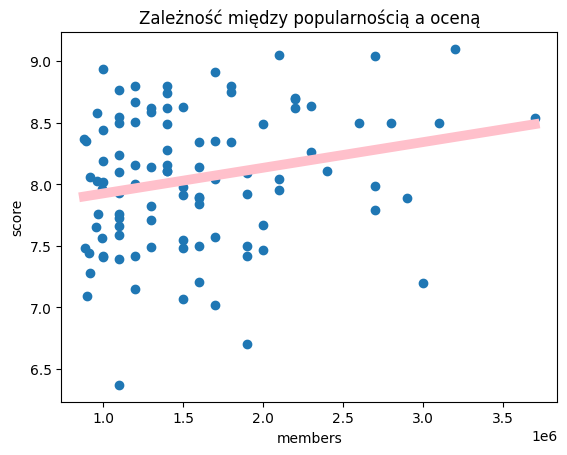

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/anime/genre/1/Action"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

score = []
members = []

div_elements = htmlParse.find_all('div', class_ = "information")
for div in div_elements:
    text = div.get_text()

    matches = re.sub('\s+', ' ', text)
    matches = re.sub('Add to List', '', matches)
    matches = re.sub('K', '000', matches)
    matches = re.sub('.(?P<nuber>\d)M', '\g<nuber>00000', matches)
    ocena = re.sub('(?P<digit>\d) \d*', '\g<digit>', matches)
    ocena = float(ocena)
    score.append(ocena)
    osoby = re.sub('\d\.\d* ', '', matches)
    osoby = int(osoby)
    members.append(osoby)


from sklearn.linear_model import LinearRegression
npX = np.array(members)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(members, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Text(0.5, 1.0, 'Zależność między popularnością a oceną')

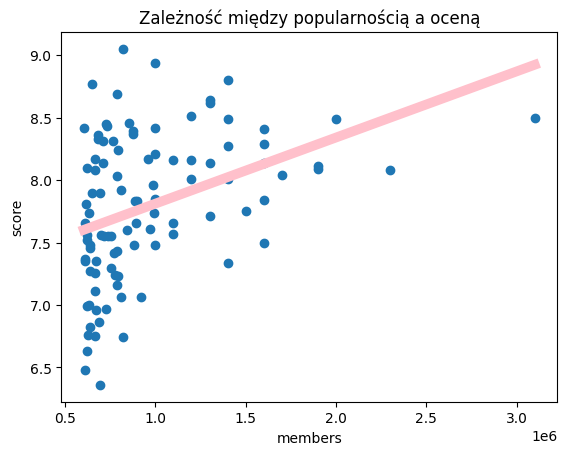

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/anime/genre/4/Comedy"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

score = []
members = []

div_elements = htmlParse.find_all('div', class_ = "information")
for div in div_elements:
    text = div.get_text()

    matches = re.sub('\s+', ' ', text)
    matches = re.sub('Add to List', '', matches)
    matches = re.sub('K', '000', matches)
    matches = re.sub('.(?P<nuber>\d)M', '\g<nuber>00000', matches)
    ocena = re.sub('(?P<digit>\d) \d*', '\g<digit>', matches)
    ocena = float(ocena)
    score.append(ocena)
    osoby = re.sub('\d\.\d* ', '', matches)
    osoby = int(osoby)
    members.append(osoby)


from sklearn.linear_model import LinearRegression
npX = np.array(members)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(members, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Text(0.5, 1.0, 'Zależność między popularnością a oceną')

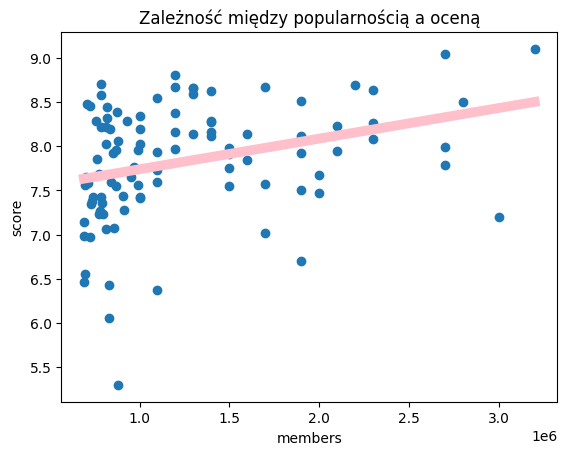

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/anime/genre/10/Fantasy"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

score = []
members = []

div_elements = htmlParse.find_all('div', class_ = "information")
for div in div_elements:
    text = div.get_text()

    matches = re.sub('\s+', ' ', text)
    matches = re.sub('Add to List', '', matches)
    matches = re.sub('K', '000', matches)
    matches = re.sub('.(?P<nuber>\d)M', '\g<nuber>00000', matches)
    ocena = re.sub('(?P<digit>\d) \d*', '\g<digit>', matches)
    ocena = float(ocena)
    score.append(ocena)
    osoby = re.sub('\d\.\d* ', '', matches)
    osoby = int(osoby)
    members.append(osoby)


from sklearn.linear_model import LinearRegression
npX = np.array(members)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(members, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Text(0.5, 1.0, 'Zależność między popularnością a oceną')

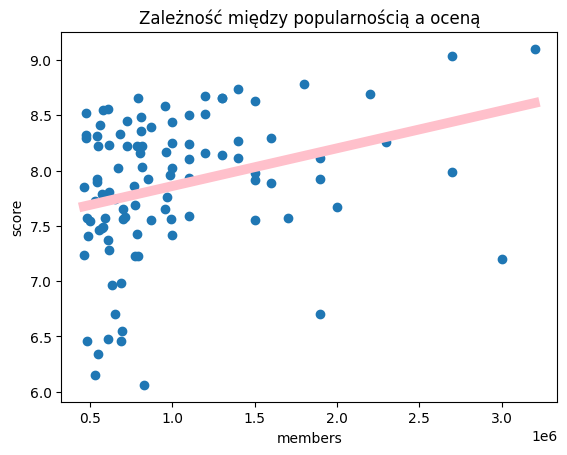

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/anime/genre/2/Adventure"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

score = []
members = []

div_elements = htmlParse.find_all('div', class_ = "information")
for div in div_elements:
    text = div.get_text()

    matches = re.sub('\s+', ' ', text)
    matches = re.sub('Add to List', '', matches)
    matches = re.sub('K', '000', matches)
    matches = re.sub('.(?P<nuber>\d)M', '\g<nuber>00000', matches)
    ocena = re.sub('(?P<digit>\d) \d*', '\g<digit>', matches)
    ocena = float(ocena)
    score.append(ocena)
    osoby = re.sub('\d\.\d* ', '', matches)
    osoby = int(osoby)
    members.append(osoby)


from sklearn.linear_model import LinearRegression
npX = np.array(members)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(members, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Text(0.5, 1.0, 'Zależność między popularnością a oceną')

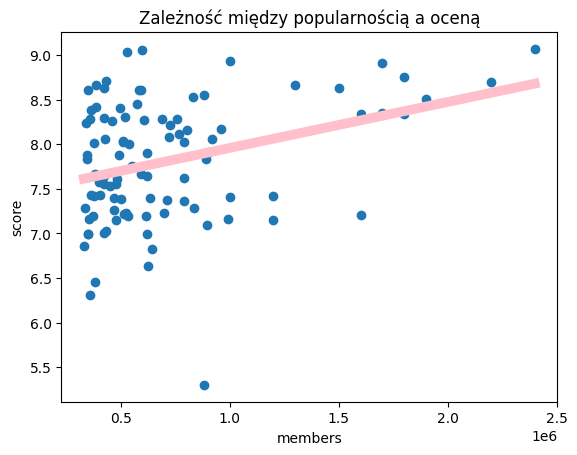

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import matplotlib.pyplot as plt

url = "https://myanimelist.net/anime/genre/24/Sci-Fi"

response = urllib.request.urlopen(url)
html = response.read()

mylist = list()

htmlParse = BeautifulSoup(html, 'html.parser')

score = []
members = []

div_elements = htmlParse.find_all('div', class_ = "information")
for div in div_elements:
    text = div.get_text()

    matches = re.sub('\s+', ' ', text)
    matches = re.sub('Add to List', '', matches)
    matches = re.sub('K', '000', matches)
    matches = re.sub('.(?P<nuber>\d)M', '\g<nuber>00000', matches)
    ocena = re.sub('(?P<digit>\d) \d*', '\g<digit>', matches)
    ocena = float(ocena)
    score.append(ocena)
    osoby = re.sub('\d\.\d* ', '', matches)
    osoby = int(osoby)
    members.append(osoby)


from sklearn.linear_model import LinearRegression
npX = np.array(members)
npY = np.array(score)
X = npX.reshape(-1, 1)
y = npY.reshape(-1, 1)

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.scatter(members, score)
plt.plot(X, y_pred, color="pink",linewidth=7.0)

plt.xlabel("members");
plt.ylabel("score");
plt.title("Zależność między popularnością a oceną")


Strona Tappytoon

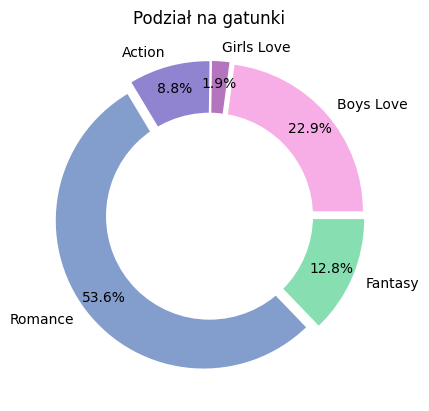

In [ ]:
# Podział na gatunki - strona Tappytoon
import matplotlib.pyplot as plt
import numpy as np

genres = ["Boys Love", "Girls Love", "Action", "Romance", "Fantasy" ]
number = [109, 9, 42, 255, 61]
colors = ['#F7ADE6', '#B474BE', '#9084D1','#839ECC', '#87DFB1']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(number, colors=colors, labels=genres,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Podział na gatunki')

# Displaying Chart
plt.show()

Strona Visual Novel data base

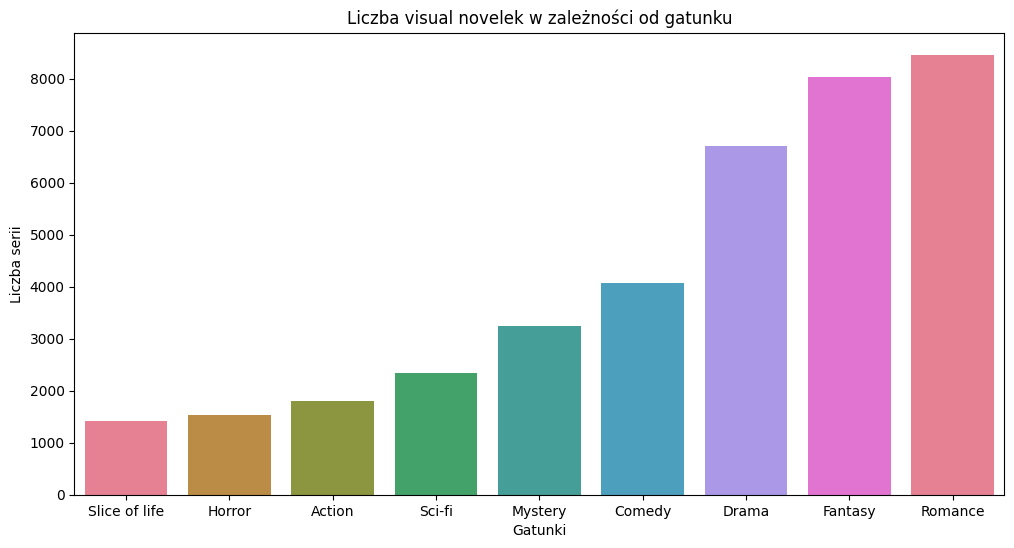

In [6]:
import seaborn as sns
import pandas as pd

# aggregate data
df = pd.DataFrame({'Gatunki': ['Romance', 'Action', 'Fantasy', 'Comedy', 'Horror', 'Mystery', 'Drama', 'Slice of life', 'Sci-fi'], 'Liczba serii': [8458, 1804, 8037, 4072, 1531, 3238, 6702, 1426, 2337]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.title("Liczba visual novelek w zależności od gatunku")
palette = sns.color_palette("husl", 8)
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, palette=palette);

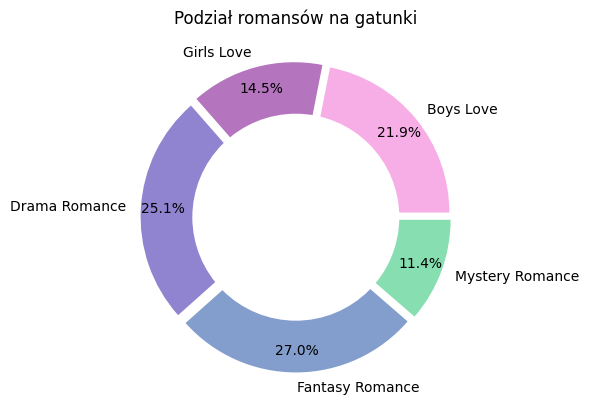

In [ ]:
# Podział romansów na gatunki - strona vn db
import matplotlib.pyplot as plt
import numpy as np

genres = ["Boys Love", "Girls Love", "Drama Romance", "Fantasy Romance", "Mystery Romance" ]
number = [1988, 1320, 2281, 2454, 1031]
colors = ['#F7ADE6', '#B474BE', '#9084D1','#839ECC', '#87DFB1']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(number, colors=colors, labels=genres,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Podział romansów na gatunki')

# Displaying Chart
plt.show()

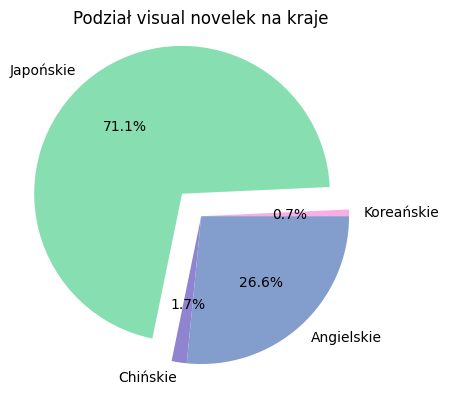

In [ ]:
# Podział na kraje - strona vn db
import matplotlib.pyplot as plt
import numpy as np

genres = ["Koreańskie", "Japońskie", "Chińskie", "Angielskie"]
number = [303, 29764, 692, 11126]
colors = ['#F7ADE6', '#87DFB1', '#9084D1','#839ECC']

myexplode = [0, 0.2, 0, 0]

plt.pie(number, colors=colors, labels=genres, autopct='%1.1f%%', explode = myexplode)

# Adding Title of chart
plt.title('Podział visual novelek na kraje')

# Displaying Chart
plt.show()

Strona novl updates

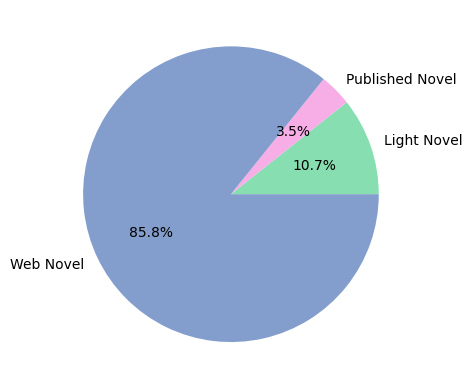

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

genres = ["Light Novel", "Published Novel", "Web Novel"]
number = [1664, 550, 13363]
colors = ['#87DFB1', '#F7ADE6','#839ECC']

plt.pie(number, colors=colors, labels=genres, autopct='%1.1f%%')

# Displaying Chart
plt.show()

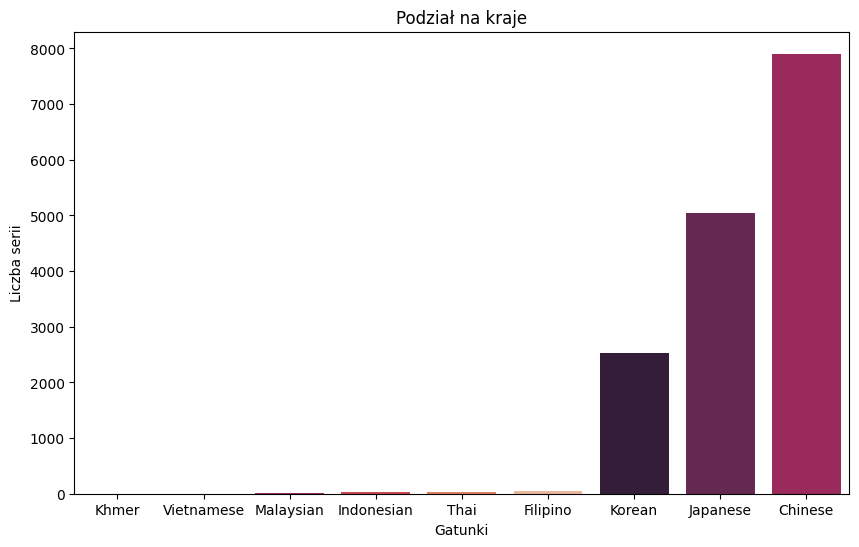

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# aggregate data
df = pd.DataFrame({'Gatunki': ["Chinese", "Filipino", "Indonesian", "Japanese", "Khmer", "Korean", "Malaysian", "Thai", "Vietnamese"], 'Liczba serii': [7906, 49, 28, 5047, 1, 2533, 9, 28, 3]})
result = df.groupby('Gatunki')['Liczba serii'].median()

# plot a bar-plot where bars are ordered by median speed
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.title("Podział na kraje")
palette = sns.color_palette("rocket")
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index, palette=palette);

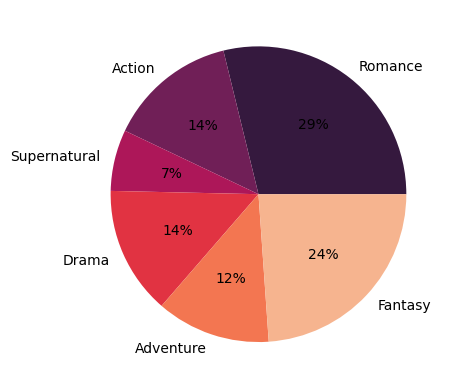

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = [10100, 4950, 2350, 4900, 4375, 8375]
keys = ['Romance', 'Action', 'Supernatural', 'Drama', 'Adventure', 'Fantasy']


# define Seaborn color palette to use
palette_color = seaborn.color_palette("rocket")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()